In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("Datasets/data_science_job.csv")

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

## To apply complete case analysis (removing data), we check that the proportion of null values is less than 5%; only then do we drop the rows or columns.

In [8]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

### [city_development_index ,enrolled_university,education_level,experience,training_hours] have <5% null values

In [9]:
df.shape

(19158, 13)

In [13]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [14]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11317,0.920,no_enrollment,NaN,3.0,52.0
1193,0.624,no_enrollment,Graduate,5.0,60.0
18916,0.890,no_enrollment,Graduate,20.0,108.0
2236,0.698,no_enrollment,Masters,12.0,6.0
13765,0.903,no_enrollment,Masters,11.0,49.0


In [16]:
df[cols].isnull().sum()

city_development_index    479
enrolled_university       386
education_level           460
experience                 65
training_hours            766
dtype: int64

In [20]:
newdf = df[cols].dropna()
newdf.isnull().sum()

city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

In [22]:
df[cols].shape, newdf.shape

((19158, 5), (17182, 5))

## compare before removing null data and after removing null data on numeric column

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Density'>

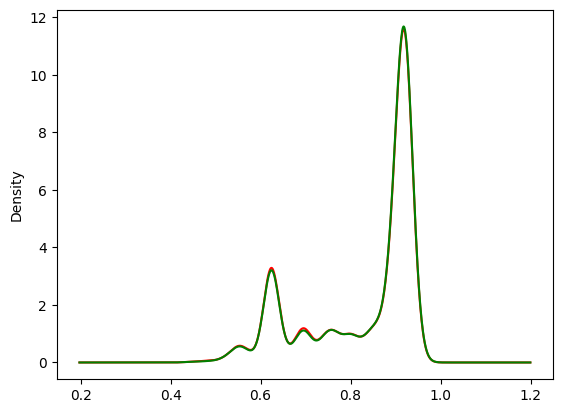

In [30]:
fig,ax = plt.subplots()
df['city_development_index'].plot.density(color='red')
newdf['city_development_index'].plot.density(color='green')

<Axes: >

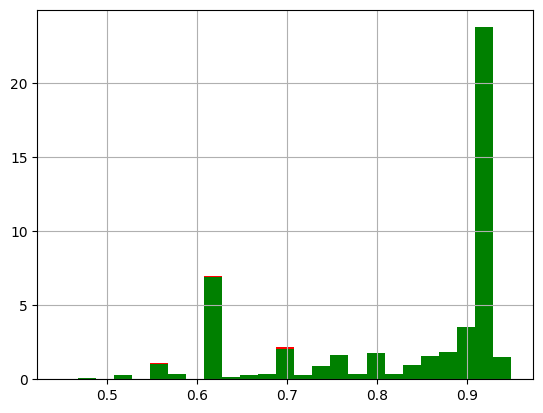

In [26]:
fig,ax = plt.subplots()
df["city_development_index"].hist(bins = 25,ax = ax,density = True,color = "red")
newdf["city_development_index"].hist(bins = 25,ax = ax,density = True,color = "green")

<Axes: >

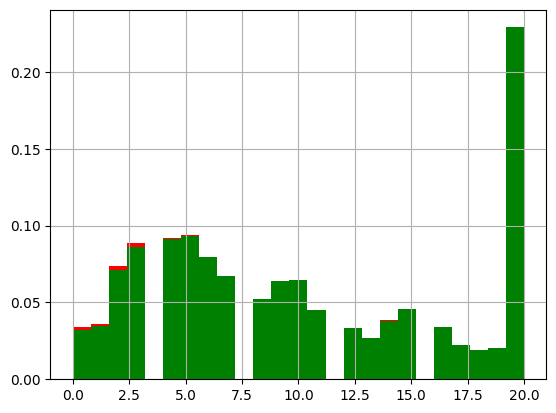

In [27]:
fig,ax = plt.subplots()
df["experience"].hist(bins = 25,ax = ax,density = True,color = "red")
newdf["experience"].hist(bins = 25,ax = ax,density = True,color = "green")

<Axes: >

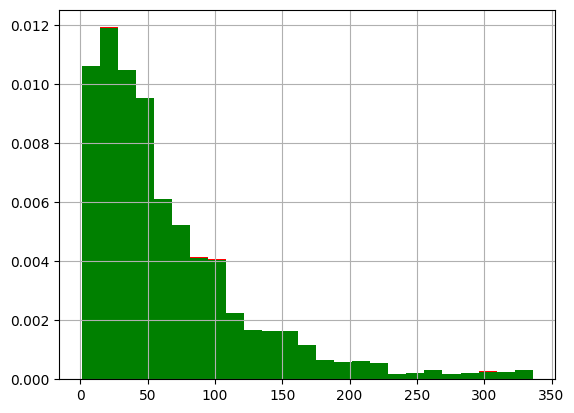

In [28]:
fig,ax = plt.subplots()
df["training_hours"].hist(bins = 25,ax = ax,density = True,color = "red")
newdf["training_hours"].hist(bins = 25,ax = ax,density = True,color = "green")

### In categorical columns, the number of categories after removing null values should remain the same or approximately the same. If there is a sudden decrease, we cannot apply complete case analysis (CCA).

In [32]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            newdf['enrolled_university'].value_counts() / len(newdf)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [33]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            newdf['education_level'].value_counts() / len(newdf)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
